<a href="https://colab.research.google.com/github/HarikrishnaYashoda/Netflix-DA/blob/main/Netflix_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns
df = pd.read_csv("netflix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**What type of content is available in different countries?**

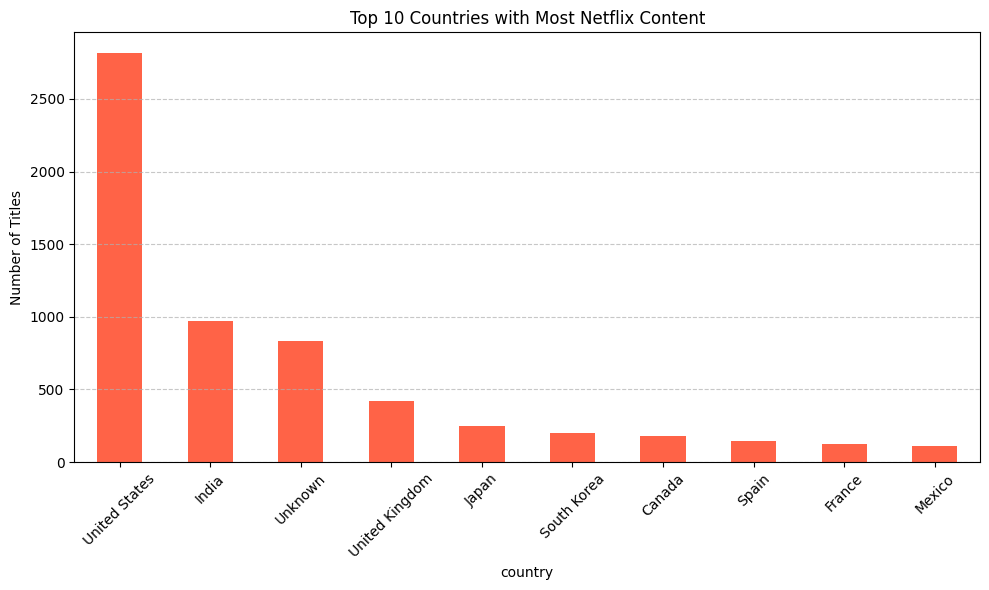

In [4]:
df['country'] = df['country'].fillna('Unknown')

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='tomato')
plt.title('Top 10 Countries with Most Netflix Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
# Split the 'country' column and get a list of all countries
country_list = list(chain(*df['country'].str.split(', ').dropna()))

# Count the occurrences of each country
country_counts = Counter(country_list)

# Get the top 10 countries
top_10_countries = country_counts.most_common(10)
print("Top 10 countries with the most content:")
for country, count in top_10_countries:
    print(f"{country}: {count}")

Top 10 countries with the most content:
United States: 3689
India: 1046
Unknown: 831
United Kingdom: 804
Canada: 445
France: 393
Japan: 318
Spain: 232
South Korea: 231
Germany: 226


In [6]:
# Group by country and count content types
content_by_country = df.groupby('country')['type'].value_counts().unstack().fillna(0)

# Display the content type distribution for the top 10 countries
print("\nContent type distribution for top 10 countries:")
print(content_by_country.loc[[country for country, count in top_10_countries]])


Content type distribution for top 10 countries:
type             Movie  TV Show
country                        
United States   2058.0    760.0
India            893.0     79.0
Unknown          440.0    391.0
United Kingdom   206.0    213.0
Canada           122.0     59.0
France            75.0     49.0
Japan             76.0    169.0
Spain             97.0     48.0
South Korea       41.0    158.0
Germany           47.0     20.0


**How has the number of movies released per year changed over the last 20-30 years?**

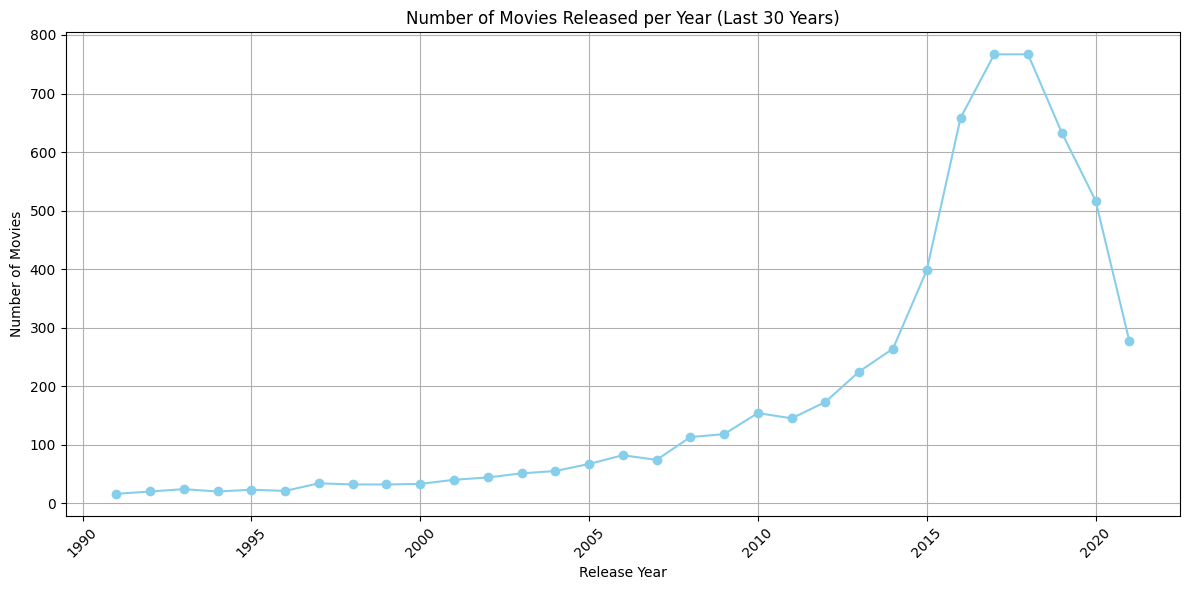

In [7]:
# Filter for movies
movies_df = df[df['type'] == 'Movie'].copy()

# Convert 'release_year' to numeric, handling potential errors
movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce')

# Drop rows where 'release_year' could not be converted to numeric
movies_df.dropna(subset=['release_year'], inplace=True)

# Convert 'release_year' to integer
movies_df['release_year'] = movies_df['release_year'].astype(int)

# Filter for the last 30 years (adjust the start year as needed)
start_year = movies_df['release_year'].max() - 30
movies_last_30_years = movies_df[movies_df['release_year'] >= start_year]

# Count movies per year
movies_per_year = movies_last_30_years['release_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Movies Released per Year (Last 30 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comparison of tv shows vs. movies.**

Comparison of Movies vs. TV Shows:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


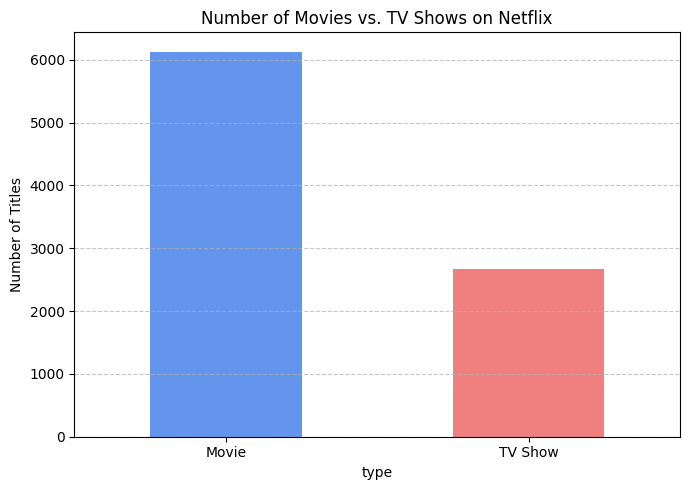

In [8]:
# Count the number of movies and TV shows
content_counts = df['type'].value_counts()

# Print the counts
print("Comparison of Movies vs. TV Shows:")
print(content_counts)

# Plot the comparison
plt.figure(figsize=(7, 5))
content_counts.plot(kind='bar', color=['cornflowerblue', 'lightcoral'])
plt.title('Number of Movies vs. TV Shows on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**What is the best time to launch a TV show?**

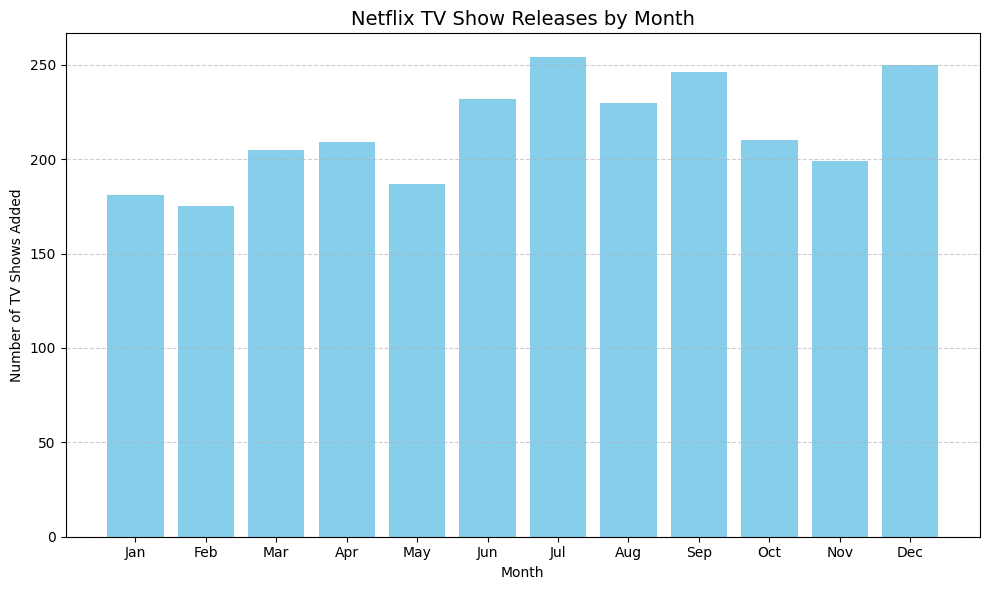

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added'] = df['date_added'].dt.month

tv_shows = df[df['type'] == 'TV Show']

tv_by_month = tv_shows['month_added'].value_counts().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(month_names, tv_by_month.values, color='skyblue')
plt.title('Netflix TV Show Releases by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Added')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Analysis of actors/directors of different types of shows/movies.**

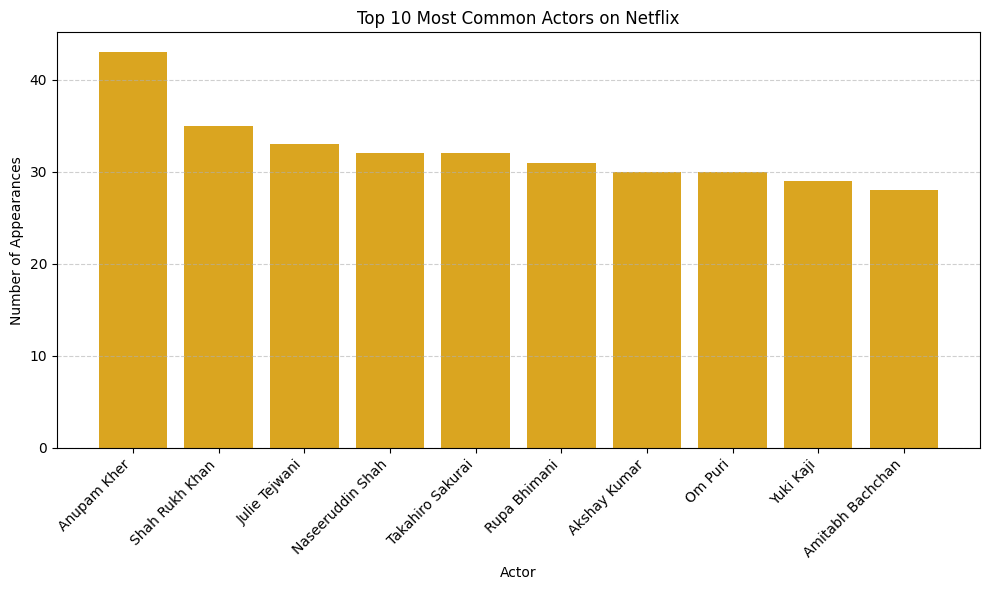

In [10]:
df['cast'] = df['cast'].fillna('')
actor_counts = Counter(chain.from_iterable([x.split(', ') for x in df['cast'] if x]))
top_actors = dict(actor_counts.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(top_actors.keys(), top_actors.values(), color='goldenrod')
plt.title('Top 10 Most Common Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Does Netflix has more focus on TV Shows than movies in recent years?**

Content added in recent years by type:
type          Movie  TV Show
release_year                
2016            658      244
2017            767      265
2018            767      380
2019            633      397
2020            517      436
2021            277      315


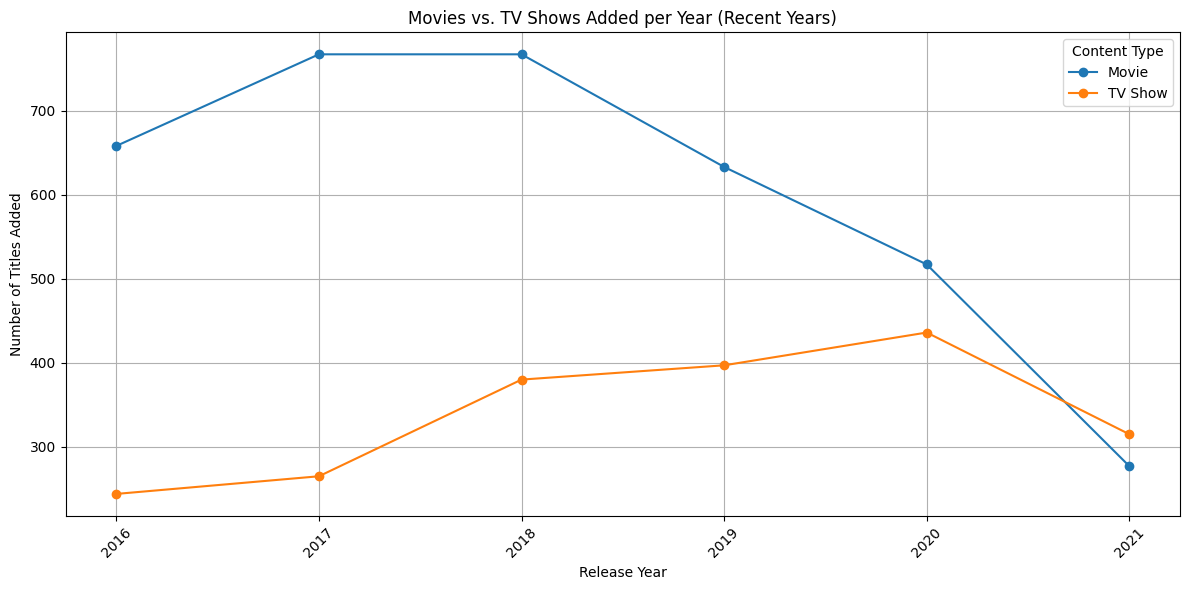

In [11]:
# Filter data for recent years (adjust the number of years as needed)
recent_years_df = df[df['release_year'] >= df['release_year'].max() - 5].copy()

# Group by release year and content type to count
content_by_year_type = recent_years_df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Print the content counts for recent years
print("Content added in recent years by type:")
print(content_by_year_type)

# Plot the trend for recent years
content_by_year_type.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Movies vs. TV Shows Added per Year (Recent Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

**Understanding what content is available in different countries**.

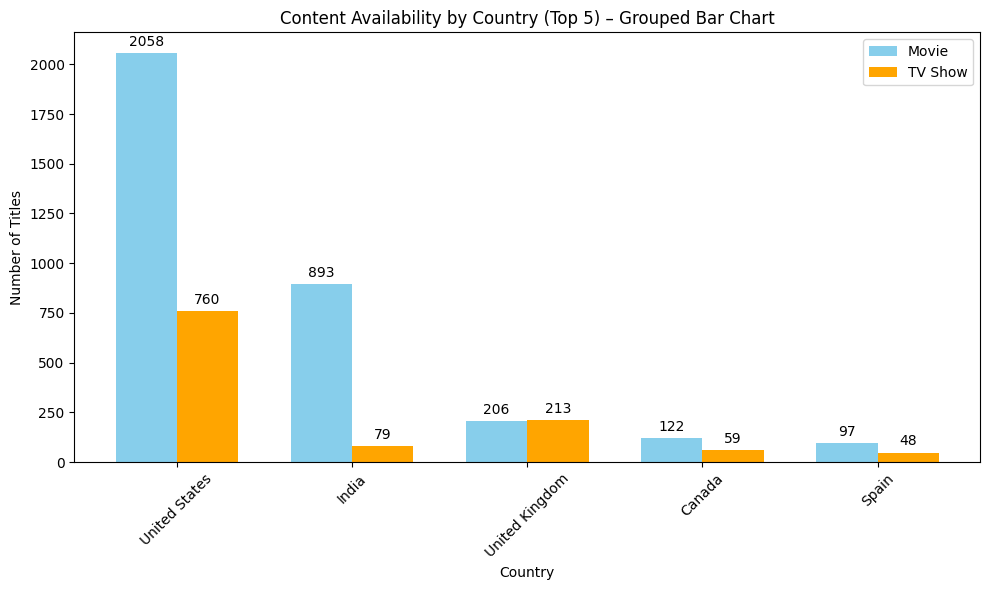

In [13]:
import numpy as np
df = df[df['country'].notna() & (df['country'].str.strip() != '')]
df = df[~df['country'].str.lower().isin(['unknown'])]

df['country'] = df['country'].str.strip()
df['type'] = df['type'].str.strip().str.title()

country_type_counts = df.groupby(['country', 'type']).size().unstack().fillna(0)

filtered = country_type_counts[(country_type_counts['Movie'] > 0) & (country_type_counts['Tv Show'] > 0)]

top5 = filtered.sort_values(by='Movie', ascending=False).head(5)

labels = top5.index.tolist()
movie_counts = top5['Movie'].tolist()
tv_counts = top5['Tv Show'].tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, movie_counts, width, label='Movie', color='skyblue')
bars2 = ax.bar(x + width/2, tv_counts, width, label='TV Show', color='orange')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Titles')
ax.set_title('Content Availability by Country (Top 5) – Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)
plt.tight_layout()
plt.show()